In [3]:
!pip install easyocr
!pip install googletrans
!pip install gTTs

     |████████████████████████████████| 48.4MB 69kB/s 
     |████████████████████████████████| 61kB 4.4MB/s 
     |████████████████████████████████| 942kB 13.3MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
     |████████████████████████████████| 102kB 13.9MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=4dace2aac84c9f44eeca8695a7fa20b9c6a08af30eda0a411a0b32a517147011
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=817d876d765a279aa1ceff61a41e640c2cac2ccd5374b1411b8e558c439311a3
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars
  Created wheel for gtts-token: filenam

In [4]:
!wget https://i.stack.imgur.com/mk1jX.jpg


--2020-08-14 18:05:14--  https://i.stack.imgur.com/mk1jX.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 104.16.0.35, 104.16.31.34, 104.16.27.34, ...
Connecting to i.stack.imgur.com (i.stack.imgur.com)|104.16.0.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45178 (44K) [image/jpeg]
Saving to: ‘mk1jX.jpg.1’

mk1jX.jpg.1         100%[===================>]  44.12K  --.-KB/s    in 0.001s  

2020-08-14 18:05:14 (70.6 MB/s) - ‘mk1jX.jpg.1’ saved [45178/45178]



In [7]:
from googletrans import Translator
import easyocr
from gtts import gTTS
from IPython.display import Audio

reader= easyocr.Reader(['ta'])
translator = Translator()

import PIL
from PIL import ImageDraw
im= PIL.Image.open("mk1jX.jpg")
im

bounds = reader. readtext('mk1jX.jpg',add_margin=0.55, width_ths=0.7,link_threshold=0.8,decoder='beamsearch')
bounds

def draw_box(image, bounds, color='yellow', width=2):
	draw = ImageDraw.Draw(image)
	for bound in bounds:
		p0,p1,p2,p3 = bound[0]
		draw.line([*p0,*p1,*p2,*p3, *p0], fill=color, width=width)
	return image


NameError: ignored

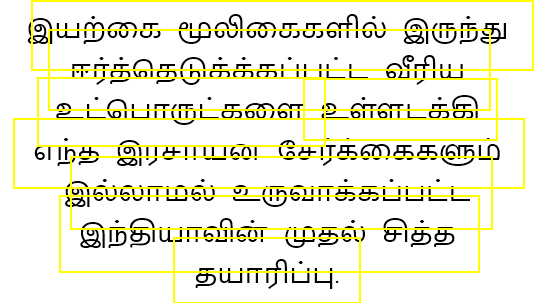

In [8]:
draw_box(im,bounds)

In [15]:


text_list = reader.readtext('mk1jX.jpg', add_margin=0.5, width_ths=0.7, link_threshold=0.8,decoder='beamsearch',blocklist='=-',detail=0)
text_list




['இயற்கை மூலிகைகளில் இருந்து',
 'ர்த்தெடுக்க்கப்பட்ட வீரிய',
 'உட்பொருட்களை _',
 'உள்ளடக்கி',
 'ந்த இரசாயன சேர்க்கைகளும்',
 'இல்லாமல் உருவாக்கப்பட்ட',
 'இந்தியாவின் முதல் சித்த',
 'தயாரிப்பு']

In [16]:
text_comb = ''.join(text_list)
text_comb
print(translator.detect(text_comb))


Detected(lang=ta, confidence=1.0)


In [19]:
text_en= translator.translate(text_comb, src ='ta')
print(text_en.text)

ta_tts = gTTS(text_en.text)
ta_tts.save('trans.mp3')

Audio('trans.mp3')



India's first by-product made without chemical additives containing active ingredients extracted from natural herbs


## Hindi bolni hai toh ye karna hoga


In [22]:
ta_tts = gTTS(text_en.text, lang='hi')
ta_tts.save('trans.mp3')

Audio('trans.mp3', autoplay=True)




In [ ]:
text_en= translator.translate(text_comb, src ='ta', dest='hi')
print(text_en.text)